In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('titanic_dataset.csv',index_col='PassengerId')

In [3]:
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [4]:
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [5]:
data.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [6]:
data['Age']=data['Age'].fillna(data['Age'].median())

In [7]:
for cols in ['Cabin','Embarked']:
  col_mode=data[cols].mode()[0]

In [8]:
for cols in ['Cabin','Embarked']:
  data[cols]=data[cols].fillna(col_mode)

In [9]:
data.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

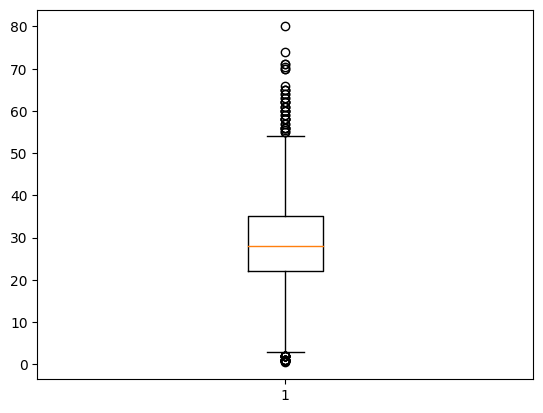

In [10]:
plt.boxplot(data['Age'])
plt.show()

In [11]:
Q1=np.percentile(data['Age'],25,interpolation='midpoint')
Q2=np.percentile(data['Age'],50,interpolation='midpoint')
Q3=np.percentile(data['Age'],75,interpolation='midpoint')

<ipython-input-11-2f4f358a73fb>:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q1=np.percentile(data['Age'],25,interpolation='midpoint')
<ipython-input-11-2f4f358a73fb>:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q2=np.percentile(data['Age'],50,interpolation='midpoint')
<ipython-input-11-2f4f358a73fb>:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q3=np.percentile(data['Age

In [12]:
print(Q1)
print(Q2)
print(Q3)

22.0
28.0
35.0


In [13]:
IQR=Q3-Q1
up_lim=Q3+1.5*IQR
low_lim=Q1-1.5*IQR
outliers = []
for i in data['Age']:
  if i>up_lim or i<low_lim:
    outliers.append(i)


In [14]:
outliers

[2.0,
 58.0,
 55.0,
 2.0,
 66.0,
 65.0,
 0.83,
 59.0,
 71.0,
 70.5,
 2.0,
 55.5,
 1.0,
 61.0,
 1.0,
 56.0,
 1.0,
 58.0,
 2.0,
 59.0,
 62.0,
 58.0,
 63.0,
 65.0,
 2.0,
 0.92,
 61.0,
 2.0,
 60.0,
 1.0,
 1.0,
 64.0,
 65.0,
 56.0,
 0.75,
 2.0,
 63.0,
 58.0,
 55.0,
 71.0,
 2.0,
 64.0,
 62.0,
 62.0,
 60.0,
 61.0,
 57.0,
 80.0,
 2.0,
 0.75,
 56.0,
 58.0,
 70.0,
 60.0,
 60.0,
 70.0,
 0.67,
 57.0,
 1.0,
 0.42,
 2.0,
 1.0,
 62.0,
 0.83,
 74.0,
 56.0]

In [15]:
ind = data['Age']>up_lim
data.loc[ind].index

Int64Index([ 12,  16,  34,  55,  95,  97, 117, 153, 171, 175, 196, 233, 253,
            269, 276, 281, 327, 367, 439, 457, 468, 484, 488, 493, 494, 546,
            556, 571, 588, 626, 627, 631, 648, 660, 673, 685, 695, 746, 773,
            830, 852, 880],
           dtype='int64', name='PassengerId')

In [16]:
data=data.drop([ 12,  16,  34,  55,  95,  97, 117, 153, 171, 175, 196, 233, 253,
            269, 276, 281, 327, 367, 439, 457, 468, 484, 488, 493, 494, 546,
            556, 571, 588, 626, 627, 631, 648, 660, 673, 685, 695, 746, 773,
            830, 852, 880])

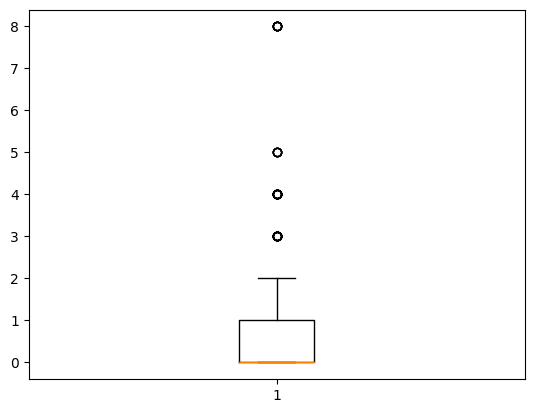

In [17]:
plt.boxplot(data['SibSp'])
plt.show()

In [18]:
Q1=np.percentile(data['SibSp'],25,interpolation='midpoint')
Q2=np.percentile(data['SibSp'],50,interpolation='midpoint')
Q3=np.percentile(data['SibSp'],75,interpolation='midpoint')

<ipython-input-18-ba1f7d630498>:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q1=np.percentile(data['SibSp'],25,interpolation='midpoint')
<ipython-input-18-ba1f7d630498>:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q2=np.percentile(data['SibSp'],50,interpolation='midpoint')
<ipython-input-18-ba1f7d630498>:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q3=np.percentile(data[

In [19]:
print(Q1)
print(Q2)
print(Q3)

0.0
0.0
1.0


In [20]:
IQR=Q3-Q1
up_lim=Q3+1.5*IQR
low_lim=Q1-1.5*IQR
outliers = []
for i in data['SibSp']:
  if i>up_lim or i<low_lim:
    outliers.append(i)

In [21]:
outliers

[3,
 4,
 3,
 3,
 4,
 5,
 3,
 4,
 5,
 3,
 3,
 4,
 8,
 4,
 4,
 3,
 8,
 4,
 8,
 3,
 4,
 4,
 4,
 4,
 8,
 3,
 3,
 5,
 3,
 5,
 3,
 4,
 4,
 3,
 3,
 5,
 4,
 3,
 4,
 8,
 4,
 3,
 4,
 8,
 4,
 8]

In [22]:
ind = data['SibSp']>up_lim
data.loc[ind].index

Int64Index([  8,  17,  25,  28,  51,  60,  64,  69,  72,  86,  89, 120, 160,
            165, 172, 177, 181, 183, 202, 230, 234, 262, 267, 279, 325, 342,
            375, 387, 410, 481, 486, 542, 543, 635, 643, 684, 687, 727, 788,
            793, 814, 820, 825, 847, 851, 864],
           dtype='int64', name='PassengerId')

In [23]:
data=data.drop([  8,  17,  25,  28,  51,  60,  64,  69,  72,  86,  89, 120, 160,
            165, 172, 177, 181, 183, 202, 230, 234, 262, 267, 279, 325, 342,
            375, 387, 410, 481, 486, 542, 543, 635, 643, 684, 687, 727, 788,
            793, 814, 820, 825, 847, 851, 864])

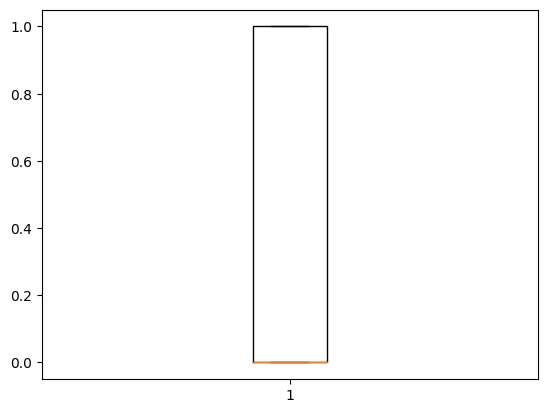

In [24]:
plt.boxplot(data['Survived'])
plt.show()

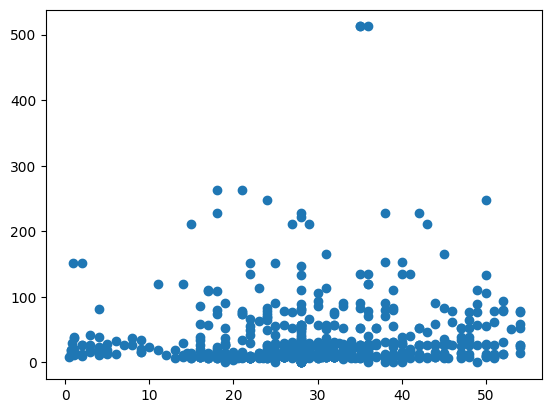

In [25]:
plt.scatter(data['Age'],data['Fare'])

In [26]:
data[data['Fare']>300].index

Int64Index([259, 680, 738], dtype='int64', name='PassengerId')

In [27]:
data=data.drop([259, 680, 738])

In [28]:
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler(feature_range=(0,1))
num_cols=['Pclass','Age','SibSp','Parch','Fare']
x=data.drop('Survived',axis=1)
x.loc[:,num_cols]=min_max.fit_transform(x.loc[:,num_cols])

In [29]:
x.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1,1.0,"Braund, Mr. Owen Harris",male,0.402762,0.5,0.0,A/5 21171,0.027632,S,S
2,0.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,0.701381,0.5,0.0,PC 17599,0.271685,C85,C
3,1.0,"Heikkinen, Miss. Laina",female,0.477417,0.0,0.0,STON/O2. 3101282,0.030205,S,S
4,0.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,0.645390,0.5,0.0,113803,0.202382,C123,S
5,1.0,"Allen, Mr. William Henry",male,0.645390,0.0,0.0,373450,0.030681,S,S


In [30]:
x.describe()

,Pclass,Age,SibSp,Parch,Fare
count,800.000000,800.000000,800.000000,800.000000,800.000000
mean,0.661875,0.524033,0.161875,0.053125,0.109033
std,0.411486,0.196383,0.268932,0.128061,0.148600
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.500000,0.416760,0.000000,0.000000,0.030094
50%,1.000000,0.514744,0.000000,0.000000,0.049547
75%,1.000000,0.626726,0.500000,0.000000,0.105765
max,1.000000,1.000000,1.000000,1.000000,1.000000
